In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read the CSV
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Preview
df.head()


Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time.csv


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")

In [4]:
# 1. Basic Info
print("Dataset Shape:", df.shape)
print("\nPreview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (9712, 8)

Preview:
    Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN   

In [5]:
# Drop duplicates if any
df = df.drop_duplicates()

In [6]:
# 2. Statistical Summary
print("\nDescriptive Statistics:\n", df.describe(include="all"))


Descriptive Statistics:
                 Age Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
count   9668.000000   9668               9668.000000           9668   
unique          NaN      2                       NaN              4   
top             NaN   Male                       NaN     Smartphone   
freq            NaN   4928                       NaN           4540   
mean      12.992760    NaN                  4.367780            NaN   
std        3.158931    NaN                  1.703002            NaN   
min        8.000000    NaN                  0.000000            NaN   
25%       10.000000    NaN                  3.427500            NaN   
50%       13.000000    NaN                  4.440000            NaN   
75%       16.000000    NaN                  5.380000            NaN   
max       18.000000    NaN                 13.890000            NaN   

       Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
count                        9668                

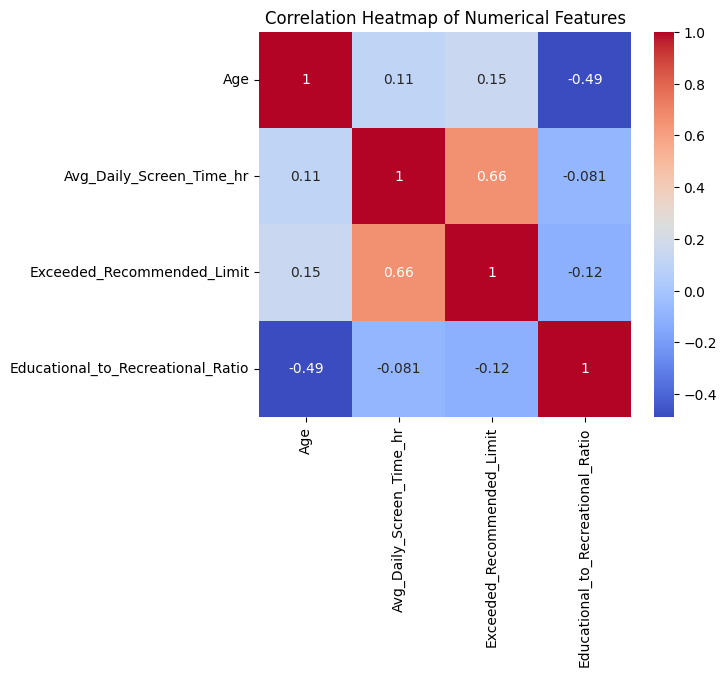

In [7]:
# 3. Correlation Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [8]:
# 4. Age Grouping
age_bins = [7, 10, 14, 18]
age_labels = ["Child (7-10)", "Pre-Teen (11-14)", "Teenager (15-18)"]
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)
print("\nAge Groups Created:\n", df[["Age", "Age_Group"]].head())


Age Groups Created:
    Age         Age_Group
0   14  Pre-Teen (11-14)
1   11  Pre-Teen (11-14)
2   18  Teenager (15-18)
3   15  Teenager (15-18)
4   12  Pre-Teen (11-14)


In [9]:
# 5. Handling Missing Health_Impacts
df["Health_Impacts"] = df["Health_Impacts"].fillna("No Reported Issues")

In [10]:
# 6. Categorizing Health Issues (Different keywords)
def categorize_impact(text):
    text = str(text).lower()
    physical_terms = ["eye", "vision", "fatigue", "posture", "weight"]
    mental_terms = ["stress", "depression", "anxiety", "addiction", "attention"]

    if any(word in text for word in physical_terms) and any(word in text for word in mental_terms):
        return "Both Physical & Mental"
    elif any(word in text for word in physical_terms):
        return "Physical"
    elif any(word in text for word in mental_terms):
        return "Mental"
    else:
        return "None"

df["Health_Category"] = df["Health_Impacts"].apply(categorize_impact)

print("\nHealth Categories:\n", df["Health_Category"].value_counts())



Health Categories:
 Health_Category
None                      6148
Physical                  1916
Mental                    1139
Both Physical & Mental     465
Name: count, dtype: int64


In [11]:
# 7. Categorize Devices
device_map = {
    "Smartphone": "Portable",
    "Tablet": "Portable",
    "Laptop": "Portable",
    "TV": "Large Screen"
}
df["Device_Type"] = df["Primary_Device"].map(device_map)
print("\nDevice Categories:\n", df[["Primary_Device", "Device_Type"]].head())


Device Categories:
   Primary_Device   Device_Type
0     Smartphone      Portable
1         Laptop      Portable
2             TV  Large Screen
3         Laptop      Portable
4     Smartphone      Portable


In [12]:
# 8. Screen Time Categories
def screen_time_band(hours):
    if hours < 2:
        return "Low"
    elif 2 <= hours <= 4:
        return "Moderate"
    else:
        return "High"

df["Screen_Time_Category"] = df["Avg_Daily_Screen_Time_hr"].apply(screen_time_band)

In [13]:
# 9. Group by Urban/Rural
grouped = df.groupby("Urban_or_Rural")["Avg_Daily_Screen_Time_hr"].mean().round(2)
print("\nAverage Screen Time by Area:\n", grouped)


Average Screen Time by Area:
 Urban_or_Rural
Rural    4.38
Urban    4.36
Name: Avg_Daily_Screen_Time_hr, dtype: float64


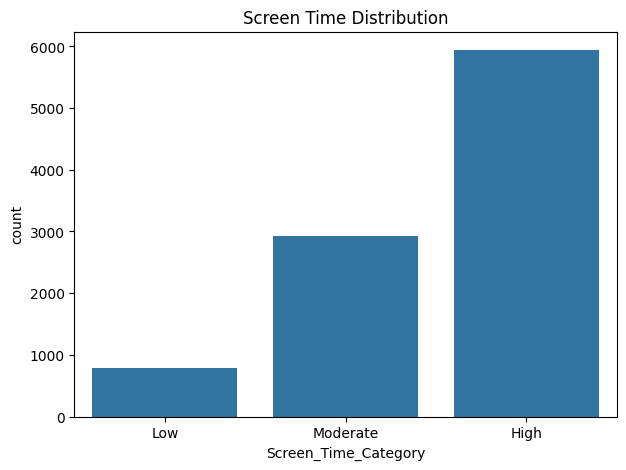

In [14]:
# 10. Visualizations
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Screen_Time_Category", order=["Low","Moderate","High"])
plt.title("Screen Time Distribution")
plt.show()

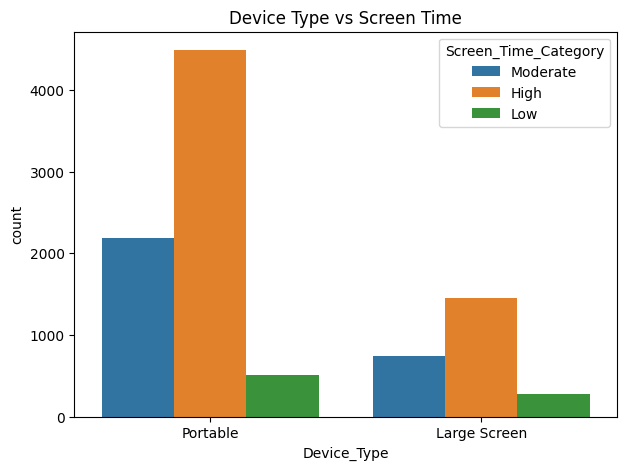

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Device_Type", hue="Screen_Time_Category")
plt.title("Device Type vs Screen Time")
plt.show()

In [17]:
# 11. Save Cleaned Dataset
df.to_csv("Kids_ScreenTime_Cleaned.csv", index=False)
print("\n Cleaned dataset saved as 'Kids_ScreenTime_Cleaned.csv'")


 Cleaned dataset saved as 'Kids_ScreenTime_Cleaned.csv'


In [18]:
files.download("Kids_ScreenTime_Cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Summary

Grouped the student's ages into bands so it's easier to compare across different age ranges.

In the health section, some students had "None" written instead of leaving it blank. We changed those to say “No Reported Issues” so it's clearer.

Health issues were then sorted into three simple categories: Physical, Mental, or Both.

When looking at device usage, we noticed that most students prefer portable devices like phones or tablets over larger screens.

Also divided their daily screen time into three groups: Low, Moderate, and High. Most of the children spend over 4 hours a day on screens, which falls in the high group.

Finally, Saved this cleaned-up dataset so it can be used for deeper analysis later.